<a href="https://colab.research.google.com/github/Stormiths/CSCE-5214-NLP-Disaster-Tweets/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving test.csv to test.csv
Saving train.csv to train.csv
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon S

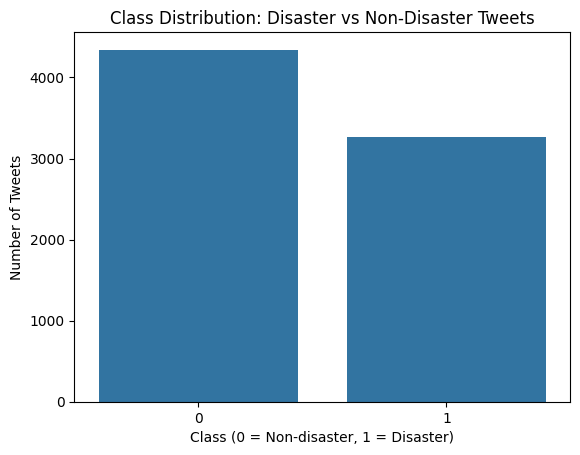

Resampled class distribution: target
1    4342
0    4342
Name: count, dtype: int64
Accuracy: 80.31%
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       858
           1       0.83      0.77      0.80       879

    accuracy                           0.80      1737
   macro avg       0.80      0.80      0.80      1737
weighted avg       0.80      0.80      0.80      1737

Predicted Class Distribution (Test dataset):
 0    1950
1    1313
Name: count, dtype: int64


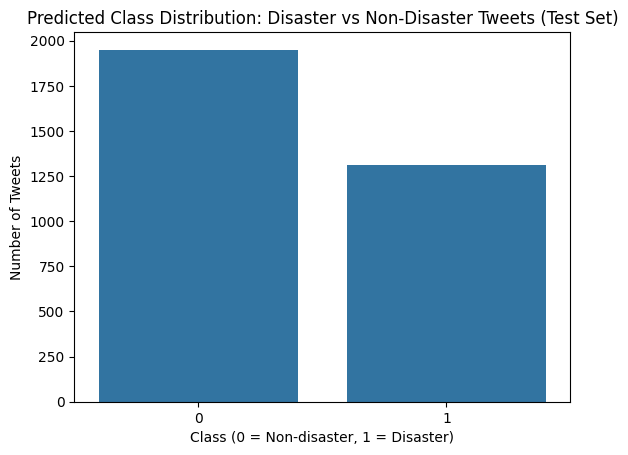

In [1]:
# Installing necessary libraries
!pip install pandas scikit-learn nltk imbalanced-learn seaborn

# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import io  # For handling file uploads

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Uploading train.csv and test.csv
uploaded = files.upload()

# Loading train.csv and test.csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Print first few rows of the training and test datasets to verify
print(train_df.head())
print(test_df.head())

# Step 2: Checking for Class Imbalance in Train Data
class_distribution = train_df['target'].value_counts()
print("Class Distribution (Train dataset):\n", class_distribution)

# Plotting the class distribution
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title("Class Distribution: Disaster vs Non-Disaster Tweets")
plt.ylabel("Number of Tweets")
plt.xlabel("Class (0 = Non-disaster, 1 = Disaster)")
plt.show()

# Step 3: Preprocessing the text (Cleaning the data)
def preprocess_text(text):
    # Removing URLs and special characters
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# Applying preprocessing to the 'text' column in train_df
train_df['clean_text'] = train_df['text'].apply(preprocess_text)

# Step 4: Converting text to numeric data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train_df['clean_text'])  # Features
y = train_df['target']  # Target labels

# Step 5: Handling Class Imbalance

# Option 1: Random Oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Option 2: SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Verifing the new class distribution after oversampling
print(f"Resampled class distribution: {pd.Series(y_resampled).value_counts()}")

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialising the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Training the model
model.fit(X_train, y_train)

# Step 8: Predictions and Evaluation
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print(classification_report(y_test, y_pred))

# Step 9: Preprocessing the test data
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

# Transforming the test data using the same TF-IDF vectorizer
X_test_final = tfidf.transform(test_df['clean_text'])

# Step 10: Making predictions on the test dataset
test_predictions = model.predict(X_test_final)

# Step 11: Checking the distribution of predictions
predicted_class_distribution = pd.Series(test_predictions).value_counts()
print("Predicted Class Distribution (Test dataset):\n", predicted_class_distribution)

# Step 12: Visualising the predicted class distribution
sns.barplot(x=predicted_class_distribution.index, y=predicted_class_distribution.values)
plt.title("Predicted Class Distribution: Disaster vs Non-Disaster Tweets (Test Set)")
plt.ylabel("Number of Tweets")
plt.xlabel("Class (0 = Non-disaster, 1 = Disaster)")
plt.show()
